# WeatherPy ☀️

---

### Import Dependancies & Setup

In [252]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [253]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Relationship Between Weather Variables and Latitude 🧐

### Use the OpenWeatherMap API 🌇 to retrieve weather data from the cities list generated in the started code

In [254]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gbadolite
Processing Record 2 of Set 1 | manakara
Processing Record 3 of Set 1 | kindu
Processing Record 4 of Set 1 | kargasok
Processing Record 5 of Set 1 | moab
Processing Record 6 of Set 1 | san julian
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | el matama
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | praia da vitoria
Processing Record 13 of Set 1 | novokazalinsk
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | mahina
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | grytviken
Processing Record 

In [255]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [256]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gbadolite,4.2833,21.0167,32.90,37,91,1.77,CD,1709050782
1,manakara,-22.1333,48.0167,25.26,91,57,3.59,MG,1709050782
2,kindu,-2.9500,25.9500,24.73,79,86,1.54,CD,1709050792
3,kargasok,59.0556,80.8572,-9.46,80,86,4.92,RU,1709050792
4,moab,38.5733,-109.5498,6.03,51,83,1.34,US,1709050797


In [257]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output/cities.csv", index_label="City_ID")

In [258]:
# Read saved data
city_data_df = pd.read_csv("../Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gbadolite,4.2833,21.0167,32.90,37,91,1.77,CD,1709050782
1,manakara,-22.1333,48.0167,25.26,91,57,3.59,MG,1709050782
2,kindu,-2.9500,25.9500,24.73,79,86,1.54,CD,1709050792
3,kargasok,59.0556,80.8572,-9.46,80,86,4.92,RU,1709050792
4,moab,38.5733,-109.5498,6.03,51,83,1.34,US,1709050797


### Scatter Plots

#### **Latitude Vs. Temperature** 🔥

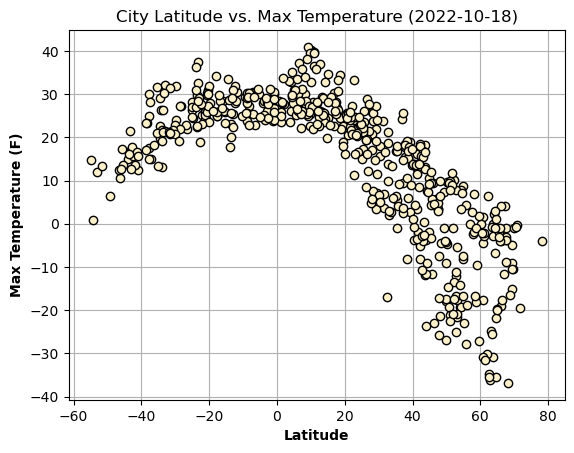

In [277]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", color="#FAF0CA", zorder=2)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (F)", fontweight="bold")
plt.xlabel("Latitude", fontweight='bold')

# Add grid and formatting
plt.grid(True, zorder=1)

# Save the figure
plt.savefig("../Output/Fig1.png")

# Show plot
plt.show()


#### **Latitude Vs. Humidity** 🌦️

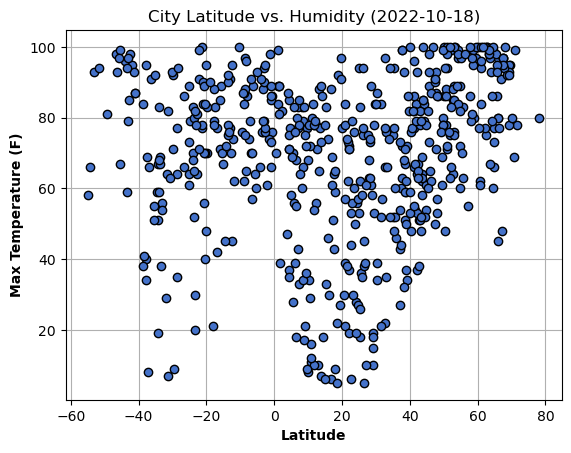

In [278]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", color="#4472CA", zorder=2)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Max Temperature (F)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")

# Add grid and formatting
plt.grid(True, zorder=1)

# Save the figure
plt.savefig("../Output/Fig2.png")

# Show plot
plt.show()

#### **Latitude Vs. Cloudiness ☁️**

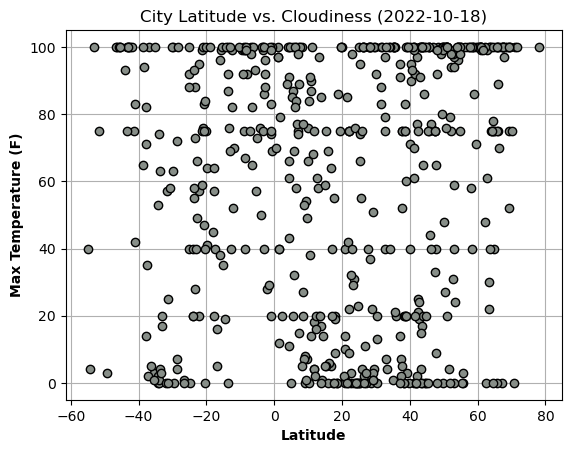

In [279]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", color="#878E88", zorder=2)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Max Temperature (F)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")

# Add grid and formatting
plt.grid(True, zorder=1)

# Save the figure
plt.savefig("../Output/Fig3.png")

# Show plot
plt.show()

#### **Latitude vs. Wind Speed Plot 💨**

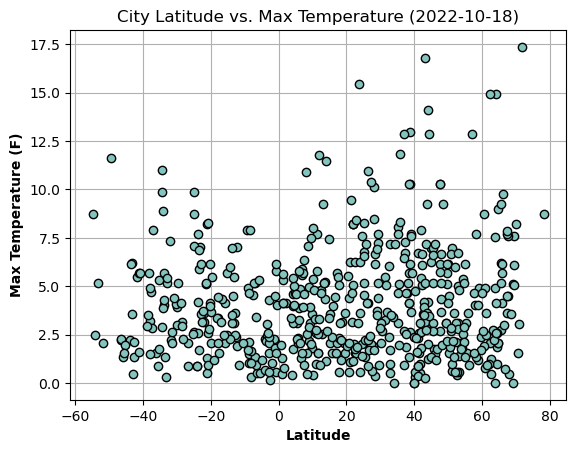

In [280]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", color="#83C5BE", zorder=2)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (F)", fontweight="bold")
plt.xlabel("Latitude", fontweight="bold")

# Add grid and formatting
plt.grid(True, zorder=1)

# Save the figure
plt.savefig("../Output/Fig4.png")

# Show plot
plt.show()

---

## Compute Linear Regression for Each Relationship 📈


In [263]:
# Define a function to create Linear Regression plots
def linear_reg(x, y, xlabel="", ylabel="", title=""):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    equation_line = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add a grid 
    plt.grid(True)

    # Plot scatter plot without legend
    plt.scatter(x, y, color="#EDCF8E", edgecolors="black", zorder=2)

    # Plot regression line with legend
    plt.plot(x, slope*x + intercept, color="red", label=equation_line)

    # Add labels and title
    plt.xlabel(xlabel, fontweight="bold")
    plt.ylabel(ylabel, fontweight="bold")
    plt.title(title)

    # Add legend
    plt.legend()

    # Parameter adjustment 
    plt.tight_layout()
    
    # Print the r-value
    print(f"The r-value is: {r_value**2}")
    
    # Show plot
    plt.show()



In [264]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gbadolite,4.2833,21.0167,32.90,37,91,1.77,CD,1709050782
3,kargasok,59.0556,80.8572,-9.46,80,86,4.92,RU,1709050792
4,moab,38.5733,-109.5498,6.03,51,83,1.34,US,1709050797
5,san julian,21.0167,-102.1667,21.24,21,1,1.10,MX,1709050798
6,thompson,55.7435,-97.8558,-27.91,63,0,3.60,CA,1709050799


In [265]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,manakara,-22.1333,48.0167,25.26,91,57,3.59,MG,1709050782
2,kindu,-2.9500,25.9500,24.73,79,86,1.54,CD,1709050792
7,port mathurin,-19.6833,63.4167,26.34,70,41,5.45,MU,1709050799
9,adamstown,-25.0660,-130.1015,26.28,73,100,2.63,PN,1709050799
12,mahina,-17.5065,-149.4890,25.87,83,40,1.54,PF,1709050804


####  **Northern Hemisphere: Temperature vs. Latitude Linear Regression Plot 🔥**

The r-value is: 0.69180348976841


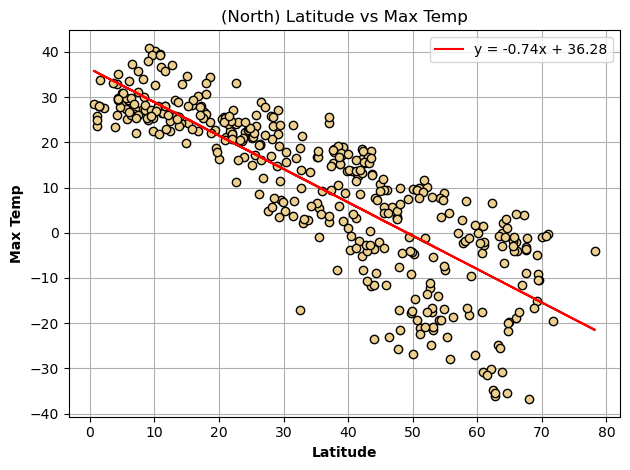

In [266]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], xlabel="Latitude", ylabel="Max Temp", title="(North) Latitude vs Max Temp")


####  **Southern Hemisphere: Temperature vs. Latitude Linear Regression Plot 🔥**

The r-value is: 0.4218195577263804


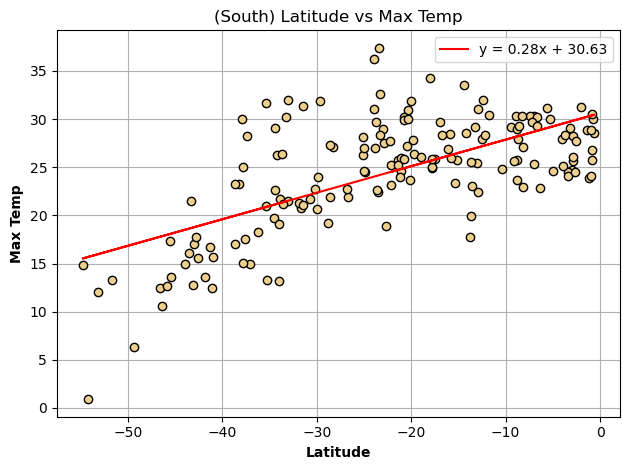

In [267]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], xlabel="Latitude", ylabel="Max Temp", title="(South) Latitude vs Max Temp")

#### <u>Discussion about the linear relationship:</u>
Data in both is concentrated very closely to the line.
- **North**
    - Greater latitude shows correlation to a significant drop in temperature
    - More density at low latitude/high temps than high latitude/low temps
    - Max temp reaches more than 40 with many data points gathered
- **South**
    - Latitude only portrays negative values - significantly different from nothern data
    - More density at higher latitude and higher temperatures
    - Max temp only reaches up to 35

---

#### **Northern Hemisphere Humidity vs. Latitude Linear Regression Plot** 🌦️

The r-value is: 0.19558674221859157


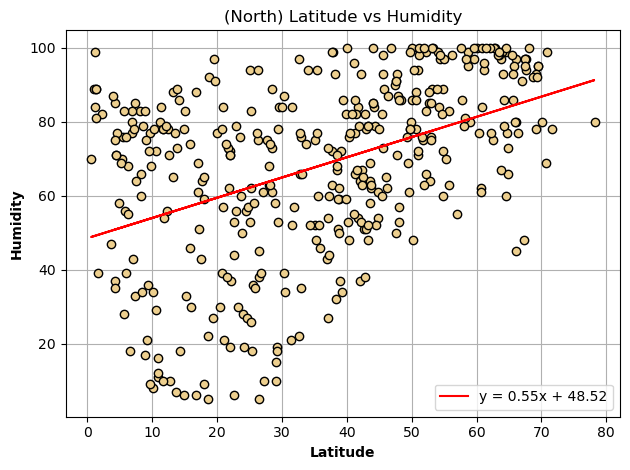

In [268]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity", title="(North) Latitude vs Humidity")

#### **Southern Hemisphere Humidity vs. Latitude Linear Regression Plot** 🌦️

The r-value is: 0.016695947195276097


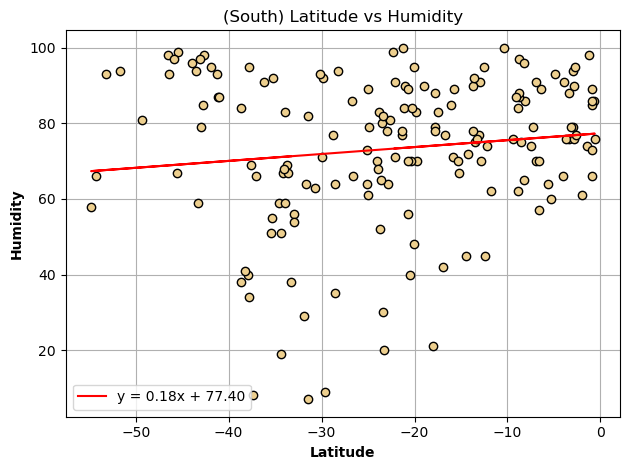

In [269]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity", title="(South) Latitude vs Humidity")

#### <u>Discussion about the linear relationship:</u>
- **North**
    - Steeper plotted line than the southern 
    - Large whitespace in bottom right corner, along with plotted data plotted closer to the top of the chart suggest humidity rises faster as latitude increases
    - Points above the line are collected more condensely than those underneath the line
- **South**
    - Relatively less inclined than the Northern line
    - As latitude increases there is a slow shift in humidity
    - Points are more sparse considering the particles have not heated up significantly as in the northern line

---

#### **Northern Hemisphere Cloudiness vs. Latitude Linear Regression Plot ☁️**

The r-value is: 0.06999301372709352


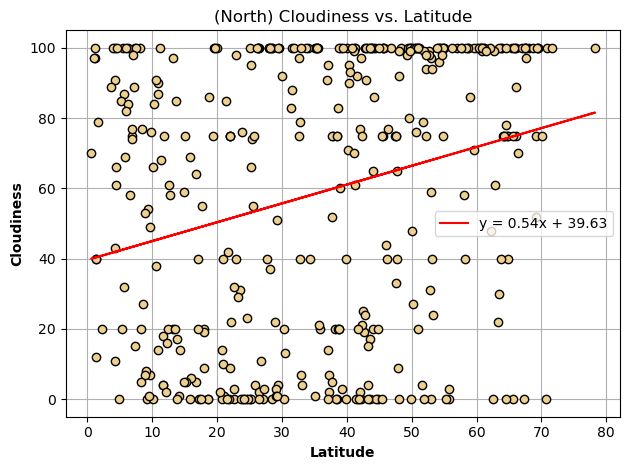

In [270]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], xlabel="Latitude", ylabel="Cloudiness", title="(North) Cloudiness vs. Latitude")

#### **Southern Hemisphere Cloudiness vs. Latitude Linear Regression Plot ☁️**

The r-value is: 0.04307107076661228


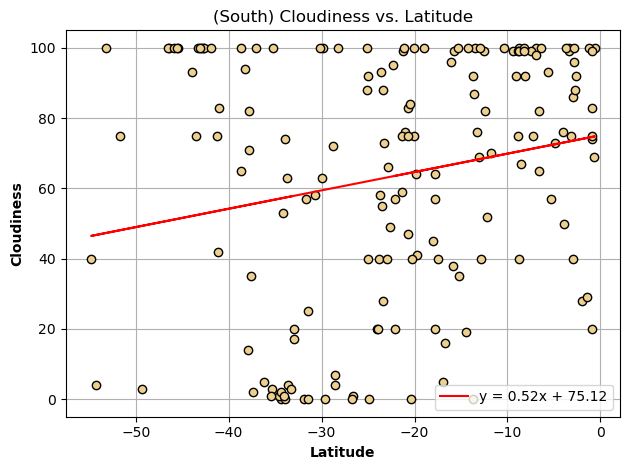

In [271]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], xlabel="Latitude", ylabel="Cloudiness", title="(South) Cloudiness vs. Latitude")

#### <u>Discussion about the linear relationship:</u>
As latitude increases cloudinessincreases at almost the same rate in both northern and southern lines.
- **North**
    - Data points are dense almost equally across the graph 
- **South**
    - Data points are slightly more sparse and tend to gather more around -40 latitude and upwards

---

#### **Nothern Wind Speed vs. Latitude Linear Regression Plot 💨**

The r-value is: 0.004004307153448213


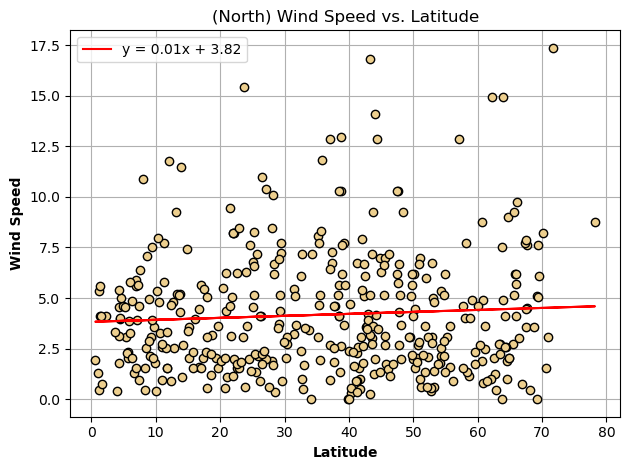

In [272]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], xlabel="Latitude", ylabel="Wind Speed", title="(North) Wind Speed vs. Latitude")

#### **Southern Wind Speed vs. Latitude Linear Regression Plot 💨**

The r-value is: 0.04384833987438353


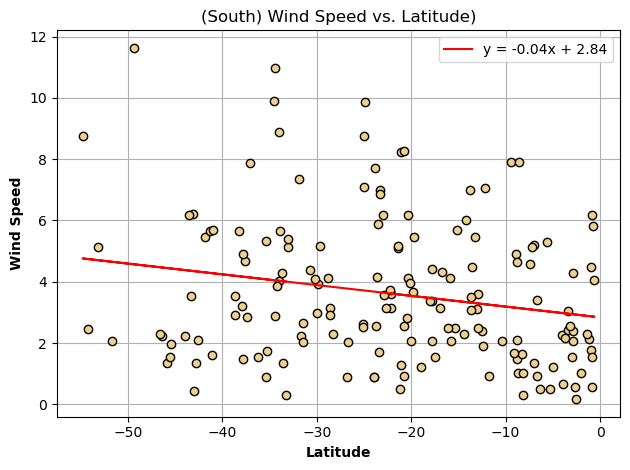

In [273]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], xlabel="Latitude", ylabel="Wind Speed", title="(South) Wind Speed vs. Latitude)")

#### <u>Discussion about the linear relationship:</u>
- **North**
    - As latitude increases, wind does not significantly shift however does show an upward trend
    - Data and line is relative to the 5.0 on wind speed
    - Densely populated at the bottom of the graph closer to low wind speeds less than 5.0
- **South**
    - Densley populated at higher latitudes
    - As latitude increases, wind speed declines in a sharp slant
    - Aproximately every 25 degree change in higher latitude knock wind speed down by 1

---